In [53]:
import numpy as np
def generate_codons(x, n):
    if n == 1:
        return x
    y = generate_codons(x, n - 1)
    result = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
    result = [result[i][0] + result[i][1] for i in np.arange(len(result))]
    return result
    
#codons = generate_codons(['U', 'C', 'A', 'G'], 3)

Спершу нам потрібно привести дані до числового виду, колонку з класом ми переводимо "+" в 1, а "-" в 0. Колонку з нуклетидами також переводимо у числові дані, наступним чином, кожну літеру (t, c, g, a) ми дешифруємо у 4 колонки (відовідно t -> (1,0,0,0), c -> (0,1,0,0), g -> (0,0,1,0), a -> (0,0,0,1)). Так робимо із кожною літерою. В результаті отримуємо 4 * 57 = 228 колонок. Ці 228 колонок даних - будуть нашим X, вхідними параметрами, колонка з класов - вихідним параметром. Далі розбиваємо дані на тренувальну та навчальну вибірки, будуємо нейронну мережу за допомогою бібліотеки sklearn, з 5 вершинами у прихованому шарі. Проводимо навчання та тестування моделі. Для того, щоб результати були менш вразливі щодо вибору тестових та тренувальних даних, застосовуємо підхід cross-validation, тобто проводимо кілька навчань та тестувань, кожен раз оцінюючи точність моделі. Після чого точністю вважаємо середнє значення. 


For model with 3 neihbors: accuracy: 0.3
For model with 5 neihbors: accuracy: 0.4
For model with 7 neihbors: accuracy: 0.46
For model with 9 neihbors: accuracy: 0.54
For model with 11 neihbors: accuracy: 0.4
For model with 13 neihbors: accuracy: 0.31


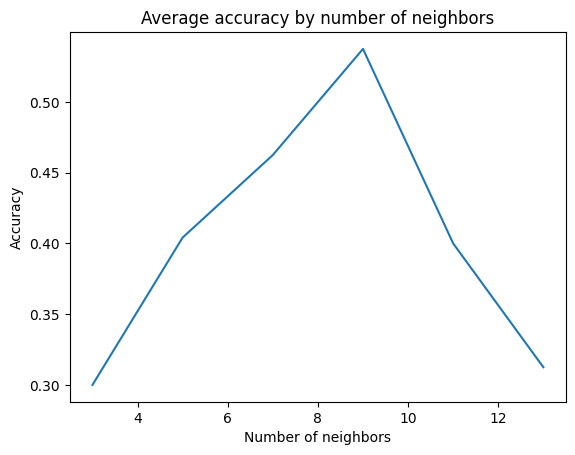

Для даного завдання ми побудувили модель на основі k-найближчих сусідів. Алгоритм працює настуним чином. Ми маємо набір вхідних даних, кожен запис якого належить  до певного класу. Наша задача для нового запису спрогнозувати його принадлежність до певного класу. Працює це настуним чином, для вхідного значення ми рахуємо відстані з ним і всіма тренувальними даними. Серед отриманих відстаней шукаємо k з найменшим значенням. Серед ним знаходимо клас, як зустівся найбільшу кількість разів. Його і будемо вважати результатом.В нашому випадку ми створили набір кодонів і класифікували його. Усі кодони конвертуємо у вектори із чисел як описано в підозділі ПРОСТІР ВЛАСТИВОСТЕЙ. Створений набір даних розділяємо на тренувальний і тестовий набір, створюємо модель, навчаємо її, робимо прогноз, рахуємо точність моделі. Оскільки через обмеженість даних точність доволі коливалась, то було використано підхів cross-validation і знайдено середнє значення точності. Далі моделі були побудовані для різної кі

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np

def convert(s):
    d = {'U': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'A': [0, 0, 1, 0], 'G': [0, 0, 0, 1]}
    res = []
    [res.extend(d[c]) for c in s]
    return res
X = [
'UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 
'UCU', 'UCC', 'UCA', 'UCG', 'CCU', 'CCC', 'CCA', 'CCG', 'ACU', 'ACC', 'ACA', 'ACG', 'GCU', 'GCC', 'GCA', 'GCG',
'UAU', 'UAC', 'UAA', 'UAG', 'CAU', 'CAC', 'CAA', 'CAG', 'AAU', 'AAC', 'AAA', 'AAG', 'GAU', 'GAC', 'GAA', 'GAG',
'UGU', 'UGC', 'UGA', 'UGG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGU', 'AGC', 'AGA', 'AGG', 'GGU', 'GGC', 'GGA', 'GGG'
]

y = [
'Phe', 'Phe', 'Leu', 'Leu', 'Leu', 'Leu', 'Leu', 'Leu', 'Ile', 'Ile', 'Ile', 'Met', 'Val', 'Val', 'Val', 'Val', 
'Ser', 'Ser', 'Ser', 'Ser', 'Pro', 'Pro', 'Pro', 'Pro', 'Thr', 'Thr', 'Thr', 'Thr', 'Ala', 'Ala', 'Ala', 'Ala',
'Tyr', 'Tyr', 'Stop', 'Stop', 'His', 'His', 'Gln', 'Gln', 'Asn', 'Asn', 'Lys', 'Lys', 'Asp', 'Asp', 'Glu', 'Glu',
'Cys', 'Cys', 'Stop', 'Trp', 'Arg', 'Arg', 'Arg', 'Arg', 'Ser', 'Ser', 'Arg', 'Arg', 'Gly', 'Gly', 'Gly', 'Gly'
]
X = np.array([convert(x) for x in X])
y = np.array(y)


def pairwise_euclidian_dist(x,x_new):
    """
    Calculates euclidian distance between each pairs of known x and unknown points x_new
    
    """
    num_pred = x_new.shape[0]
    num_data = x.shape[0]
    
    dists = np.zeros((num_pred, num_data))

    for i in range(num_pred):
        for j in range(num_data):
            # calculate euclidian distance here
            dists[i][j] = np.sqrt(np.sum((x_new[i] - x[j])**2))
            
    return dists

def k_nearest_labels(dists, y_known, k):
    """
    This function returns labels of k-nearest neighbours to each sample for unknown data.
    
    """
        
    num_pred = dists.shape[0]
    n_nearest = []
    
    for j in range(num_pred):
        dst = dists[j]
        # count k closest points 
        if(len(dst)==k):
            closest_y = y_known[np.argsort(dst)]
        else:
            closest_y = y_known[np.argpartition(dst, k)][:k]
        
        n_nearest.append(closest_y)
    return np.asarray(n_nearest) 

class KNearest_Neighbours(object):
    def __init__(self, k):
        self.k = k
        self.test_set_x = None
        self.train_set_x = None
        self.train_set_y = None

        
    def fit(self, train_set_x, train_set_y):
        self.train_set_x = train_set_x
        self.train_set_y = train_set_y

        
    def predict(self, test_set_x):
        dists = pairwise_euclidian_dist(self.train_set_x, test_set_x)
        neighbors = k_nearest_labels(dists, self.train_set_y, self.k)
        predictions = [max(set(list(row)), key=list(row).count) for row in neighbors]
        assert len(predictions) == len(test_set_x)
        return predictions

accs_by_n = []
ns = np.arange(3, 15, 2)
for n in ns:
    accs = []
    cv = KFold(n_splits=20, shuffle=True)
    for train_index, test_index in cv.split(X, y):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]
        model = KNearest_Neighbours(n)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        accs.append(accuracy)
    accs = np.array(accs)
    acc = accs.mean()
    accs_by_n.append(acc)
    print('For model with {} neihbors: accuracy: {}'.format(n, np.round(acc, 2)))

import matplotlib.pyplot as plt
 
# Create bars and choose color
plt.plot(ns, accs_by_n)
 
# Add title and axis names
plt.title('Average accuracy by number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

plt.show()

print("Для даного завдання ми побудувили модель на основі k-найближчих сусідів. Алгоритм працює настуним чином. Ми маємо набір вхідних даних, кожен запис якого належить  до певного класу. Наша задача для нового запису спрогнозувати його принадлежність до певного класу. Працює це настуним чином, для вхідного значення ми рахуємо відстані з ним і всіма тренувальними даними. Серед отриманих відстаней шукаємо k з найменшим значенням. Серед ним знаходимо клас, як зустівся найбільшу кількість разів. Його і будемо вважати результатом." + 
      "В нашому випадку ми створили набір кодонів і класифікували його. Усі кодони конвертуємо у вектори із чисел як описано в підозділі ПРОСТІР ВЛАСТИВОСТЕЙ. Створений набір даних розділяємо на тренувальний і тестовий набір, створюємо модель, навчаємо її, робимо прогноз, рахуємо точність моделі. Оскільки через обмеженість даних точність доволі коливалась, то було використано підхів cross-validation і знайдено середнє значення точності. Далі моделі були побудовані для різної кількості сусідів і побудовно графік залежності точності від кількості сусідів. Було отримано, що найвища точність досягаєтсья при n_neighbors=9 і становить 0.58. Але дана точність не надто висока.")

In [4]:
import pandas as pd
import re
import numpy as np

# Data loading and preprocessing
path = 'data/promoters.txt'
df = pd.read_csv(path, header = None)
df.columns = ['IsPromoter', 'Amin', 'Sequence']
df['IsPromoter'] = df['IsPromoter'].apply(lambda x: 1 if x == '+' else 0)
df['Sequence'] = df['Sequence'].apply(lambda x: re.sub('\s+', '', x))
def convert(s):
    d = {'t': [1, 0, 0, 0], 'c': [0, 1, 0, 0], 'a': [0, 0, 1, 0], 'g': [0, 0, 0, 1]}
    res = []
    [res.extend(d[c]) for c in s]
    return res
df['Sequence_array'] = df['Sequence'].apply(lambda x: convert(x))
df1 = pd.DataFrame(df['Sequence_array'].values.tolist())
df.head()
X = df1.to_numpy()
y = df['IsPromoter'].to_numpy()

#np.any(df1.isnull())

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

accs = []
cv = KFold(n_splits=5, shuffle=True)
for train_index, test_index in cv.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accs.append(accuracy_score(y_test, y_pred))
accs = np.array(accs)
acc = accs.mean()
print('The mean accuracy is {}'.format(np.round(acc, 4)))

In [5]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


The mean accuracy is 0.7736


In [21]:
X.shape

(106, 228)

In [22]:
y.shape

(106,)